<a href="https://colab.research.google.com/github/rbpernas/Learning_Projects/blob/main/House_prices_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic analisys and model
In this notebook I'm reproducing the analisys and prediction suggested in Kaggle's web.

## Import dataset

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

## Load the dataset


In [ ]:
from google.colab import files

# This will open a file picker where you can select your train.csv file
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving train.csv to train (1).csv
User uploaded file "train (1).csv" with length 460676 bytes


After uploading, you can verify the file is in the current directory or list all files in `/content/`.

In [ ]:
!ls -F

 house-prices-advanced-regression-techniques.zip  'train (1).csv'
 sample_data/					   train.csv


In [ ]:
dataset_df = pd.read_csv("/content/train.csv")
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [ ]:
dataset_df = dataset_df.drop('Id', axis=1) #Not necessary to train models
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## House price distribution
Visualizing the dataset

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipython-input-1912466374.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

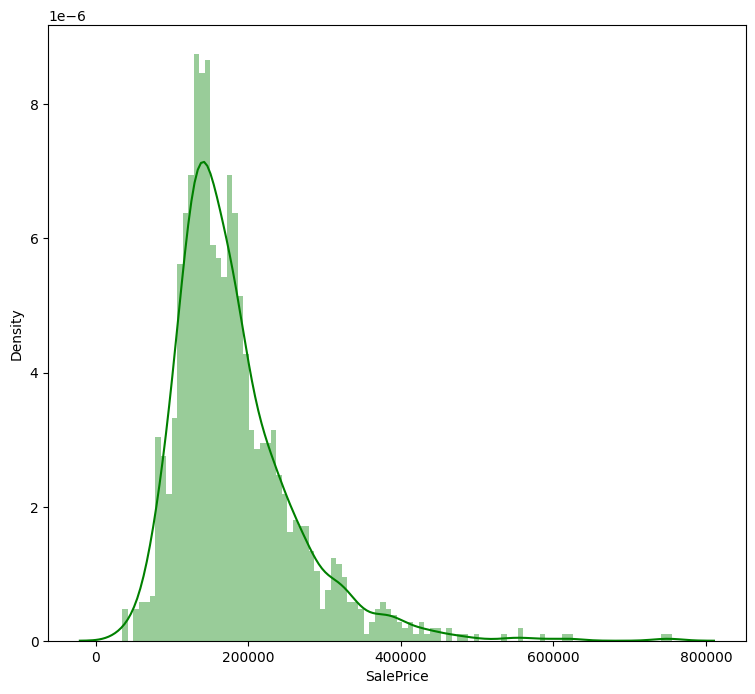

In [ ]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

### Numerical data distribution

In [ ]:
list(set(dataset_df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [ ]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


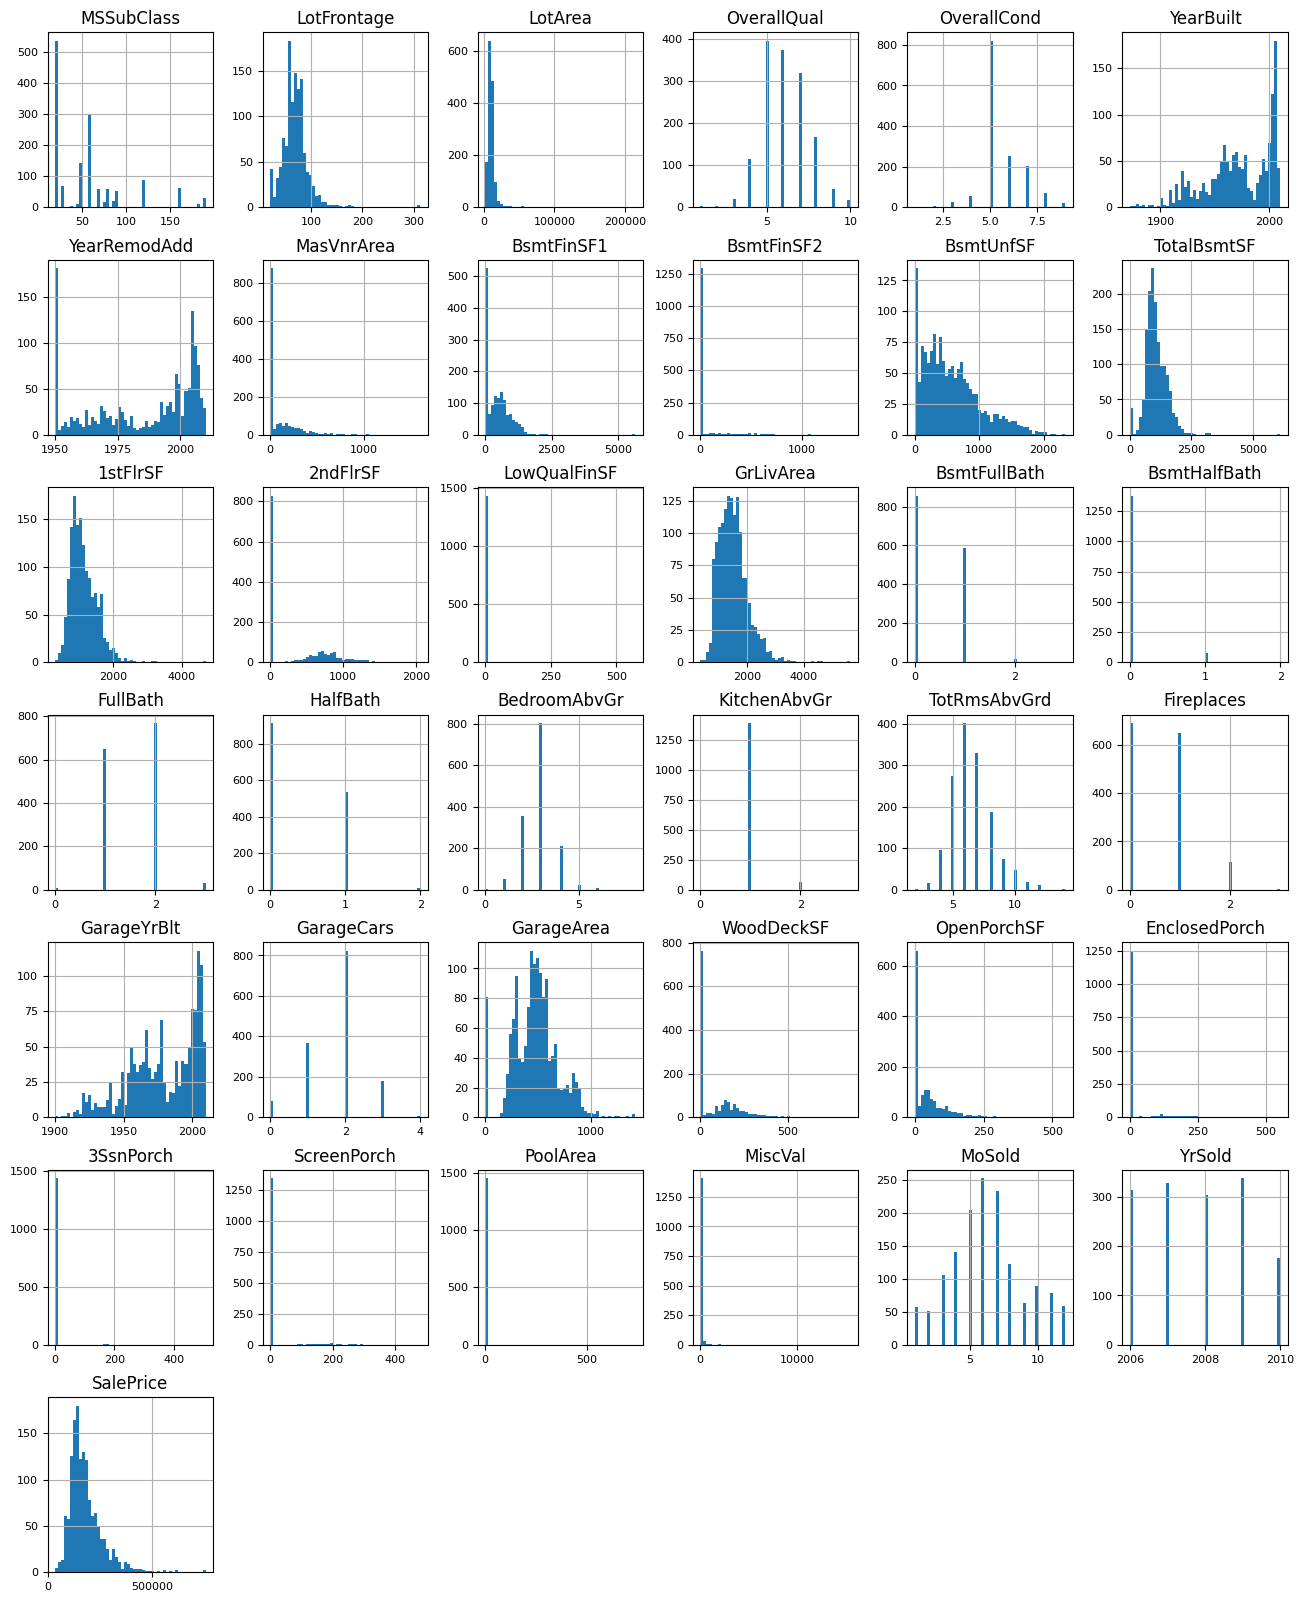

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


## Prepare the dataset
Split in training and testing for making predictions

In [ ]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1018 examples in training, 442 examples in testing.


Converting format from Pandas into TensorFlow

In [ ]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

List of available models

In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

## Create a random forest

In [ ]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmpvusw8po4 as temporary training directory


Train the model

In [ ]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:05.620761. Found 1018 examples.
Training model...
Model trained in 0:00:03.084191
Compiling model...
Model compiled.


Visualize the model

In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=2)

Evaluating the model

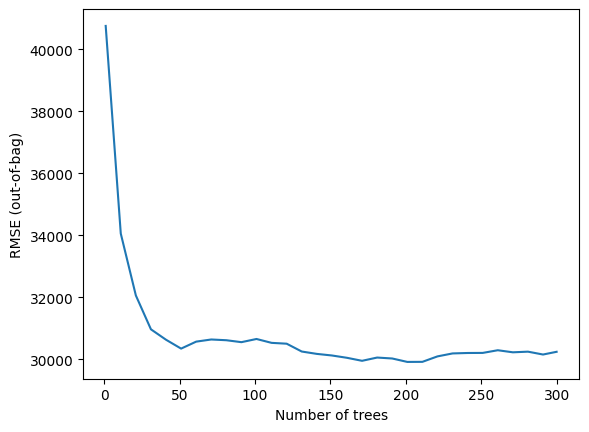

In [ ]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [ ]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1018, accuracy=None, loss=None, rmse=30236.753919754367, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - mse: 692444096.0000
loss: 0.0000
mse: 692444096.0000


Variable importances

In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [ ]:
inspector.variable_importances()["SUM_SCORE"]

[("OverallQual" (1; #62), 527744588756366.5),
 ("Neighborhood" (4; #59), 196623553106627.53),
 ("GrLivArea" (1; #38), 183946344497333.1),
 ("ExterQual" (4; #22), 179255119013299.0),
 ("GarageCars" (1; #32), 86871069076067.0),
 ("TotalBsmtSF" (1; #73), 81594399699111.31),
 ("1stFlrSF" (1; #0), 59872761549702.016),
 ("GarageArea" (1; #31), 56632375840930.47),
 ("BsmtQual" (4; #14), 51143968463414.0),
 ("BsmtFinSF1" (1; #8), 49260373581571.13),
 ("YearBuilt" (1; #76), 48725899317000.04),
 ("KitchenQual" (4; #44), 42577899208525.0),
 ("2ndFlrSF" (1; #1), 31617219275084.53),
 ("LotArea" (1; #47), 27226619428145.094),
 ("FullBath" (1; #29), 22167669248976.0),
 ("TotRmsAbvGrd" (1; #72), 16055000706028.5),
 ("GarageYrBlt" (1; #37), 13608152129056.0),
 ("Fireplaces" (1; #27), 13329834489581.68),
 ("Exterior2nd" (4; #24), 12386146037382.375),
 ("BedroomAbvGr" (1; #4), 12018070255369.844),
 ("Exterior1st" (4; #23), 9367080446614.5),
 ("YearRemodAdd" (1; #77), 9141873445931.031),
 ("LotFrontage" (

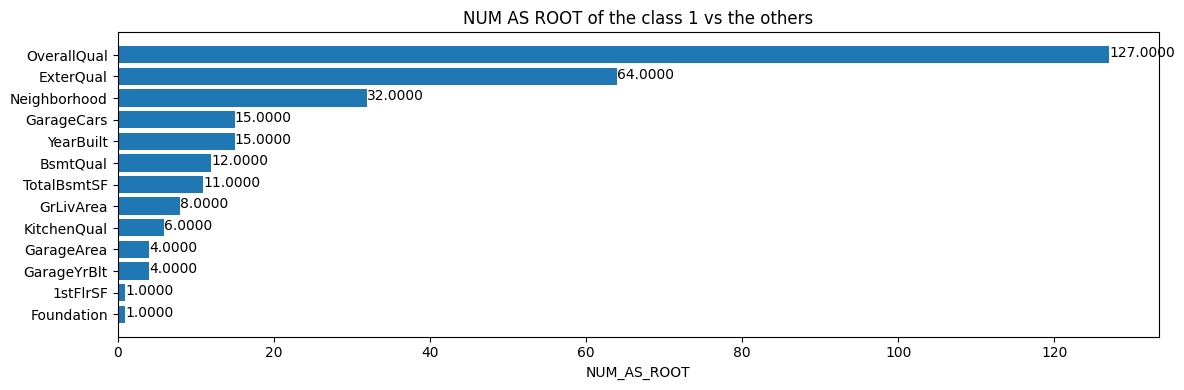

In [ ]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

## Submission

In [ ]:
test_uploaded_files = files.upload()
# Extract the filename from the dictionary returned by files.upload()
# Assuming only one file is uploaded, we take the first key.
if test_uploaded_files:
    test_file_name = next(iter(test_uploaded_files))
    test_data = pd.read_csv(test_file_name)
else:
    print("No file uploaded. Please upload a test CSV file.")
    # Optionally, handle the error or exit if no file is uploaded
    # For now, we'll stop execution after this message
    raise FileNotFoundError("No test file was uploaded.")

ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

Saving test.csv to test (1).csv
2/2 [==============================] - 1s 28ms/step


,Id,SalePrice
0,1461,126831.632812
1,1462,153427.312500
2,1463,179987.328125
3,1464,180352.078125
4,1465,194020.390625


In [ ]:
sample_submission_df = pd.read_csv('/content/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 25ms/step


,Id,SalePrice
0,1461,126831.632812
1,1462,153427.312500
2,1463,179987.328125
3,1464,180352.078125
4,1465,194020.390625
